       diversity_score  tomatometer  audience_score  profitability
count      2322.000000  2322.000000     2322.000000   2.322000e+03
mean          0.132432    54.795866       60.322567   7.940323e+07
std           0.064557    27.595163       19.760189   1.841722e+08
min           0.010038     0.000000        9.000000  -1.995488e+08
25%           0.084161    31.000000       45.000000  -2.625722e+06
50%           0.122110    56.500000       61.000000   1.564936e+07
75%           0.170119    80.000000       77.000000   7.880318e+07
max           0.412728   100.000000      100.000000   2.388912e+09


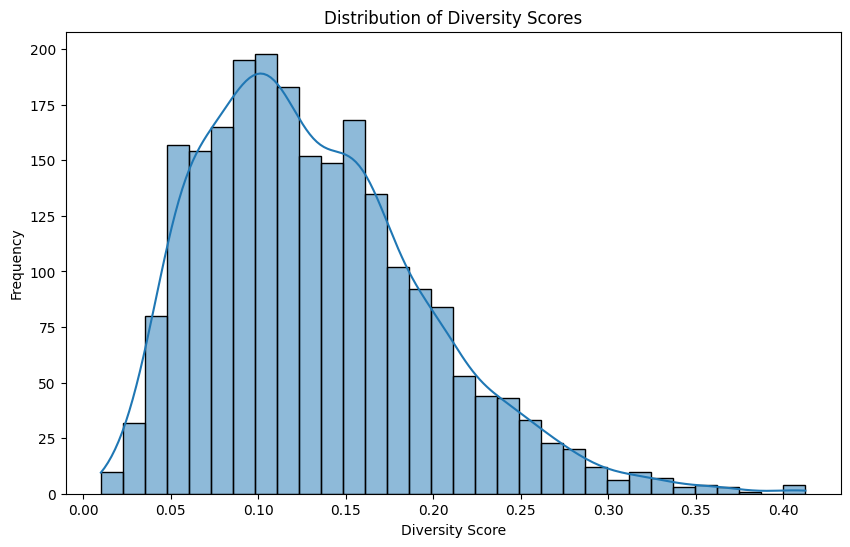

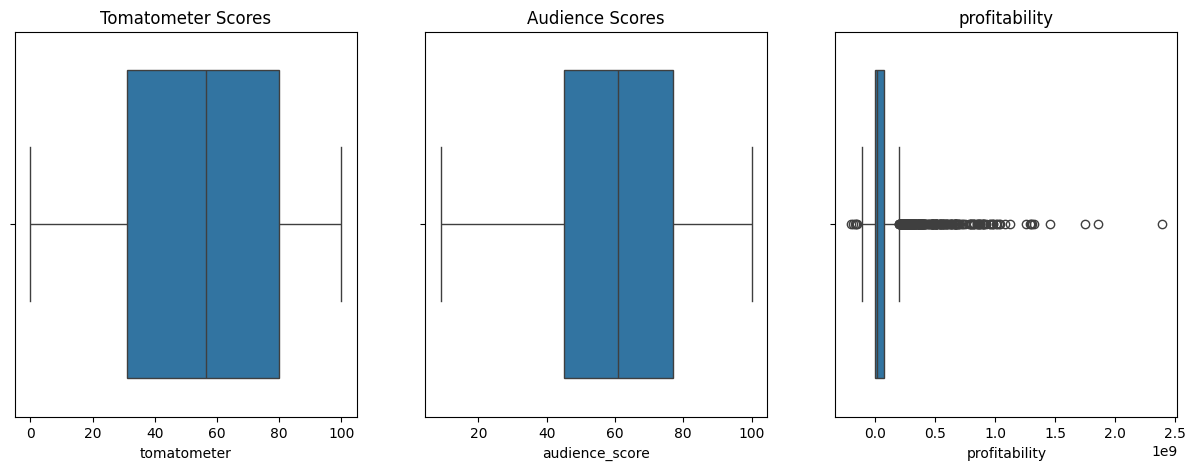

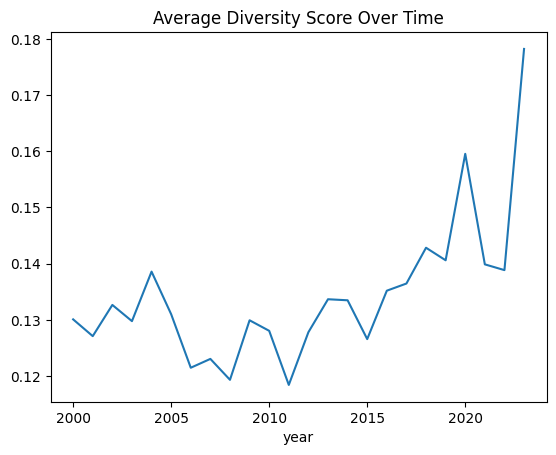

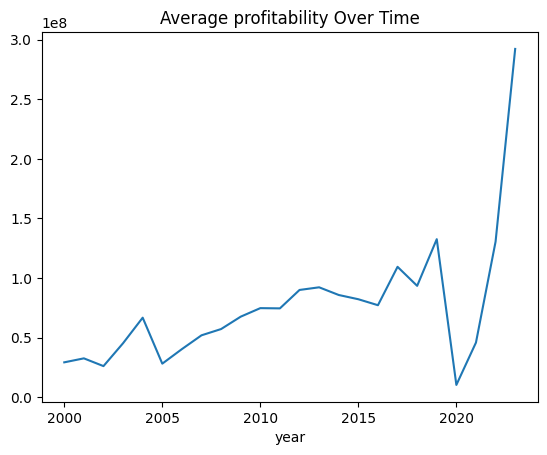

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data_with_diversity.csv')

# Summary statistics for diversity score and success metrics
print(df[['diversity_score', 'tomatometer', 'audience_score', 'profitability']].describe())

# Histograms for the distribution of diversity score and success metrics
plt.figure(figsize=(10, 6))
sns.histplot(df['diversity_score'], kde=True)
plt.title('Distribution of Diversity Scores')
plt.xlabel('Diversity Score')
plt.ylabel('Frequency')
plt.show()

# Boxplots for success metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(ax=axes[0], x=df['tomatometer'])
sns.boxplot(ax=axes[1], x=df['audience_score'])
sns.boxplot(ax=axes[2], x=df['profitability'])
axes[0].set_title('Tomatometer Scores')
axes[1].set_title('Audience Scores')
axes[2].set_title('profitability')
plt.show()

# Time series trends
df.groupby('year')['diversity_score'].mean().plot(title='Average Diversity Score Over Time')
plt.show()
df.groupby('year')['profitability'].mean().plot(title='Average profitability Over Time')
plt.show()


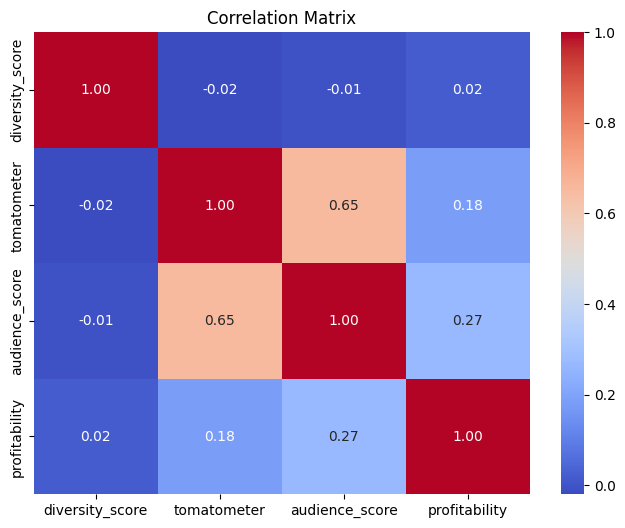

In [47]:
# Correlation matrix with p-values
corr = df[['diversity_score', 'tomatometer', 'audience_score', 'profitability']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [53]:
import statsmodels.api as sm

# Simple linear regression with diversity score predicting profitability
X = df['diversity_score']
y = df['profitability']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          profitability   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.434
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0640
Time:                        11:34:44   Log-Likelihood:                -47483.
No. Observations:                2322   AIC:                         9.497e+04
Df Residuals:                    2320   BIC:                         9.498e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.488e+07   8.72e+06     

In [54]:
# Multiple regression with more predictors
predictors = ['diversity_score', 'tomatometer', 'audience_score', 'year']
X = df[predictors]
y = df['profitability']
X = sm.add_constant(X)  # Adds a constant term to the predictors

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          profitability   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     48.44
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.53e-39
Time:                        11:34:53   Log-Likelihood:                -47392.
No. Observations:                2322   AIC:                         9.479e+04
Df Residuals:                    2317   BIC:                         9.482e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.883e+09   1.38e+09     

In [55]:
from scipy import stats

# Define high and low diversity based on the median
high_diversity = df[df['diversity_score'] >= df['diversity_score'].median()]
low_diversity = df[df['diversity_score'] < df['diversity_score'].median()]

# Perform t-test
t_stat, p_val = stats.ttest_ind(high_diversity['profitability'], low_diversity['profitability'], equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 2.275456634333003, P-value: 0.022976591757776093


/var/folders/b_/lxxyjnjs19lgxdfkyr1t4ntm0000gn/T/ipykernel_75317/1862971684.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='audience_score', hue='diversity_category', data=df, ci=None)


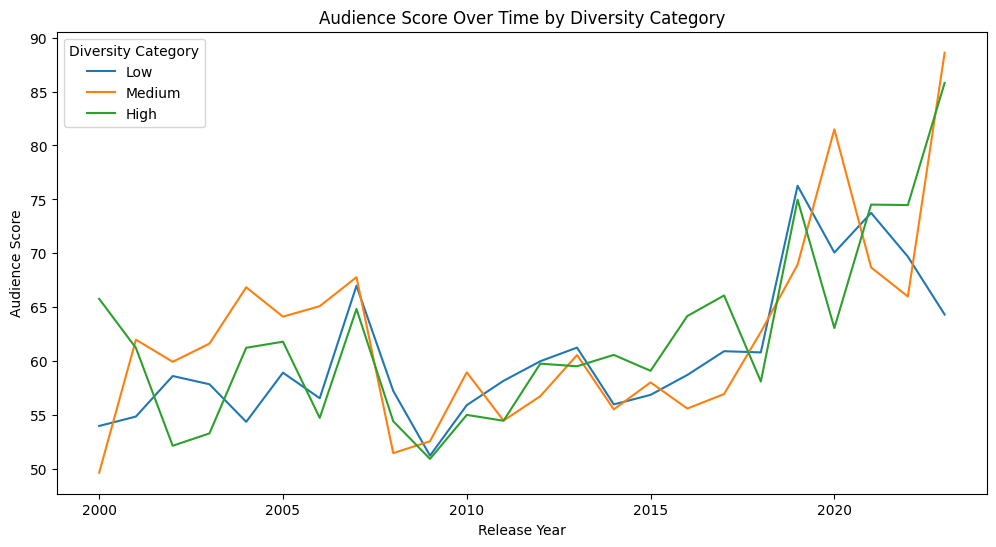

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# You can categorize diversity scores into bins for easier analysis, e.g., low, medium, high
df['diversity_category'] = pd.qcut(df['diversity_score'], q=3, labels=["Low", "Medium", "High"])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='audience_score', hue='diversity_category', data=df, ci=None)
plt.title('Audience Score Over Time by Diversity Category')
plt.xlabel('Release Year')
plt.ylabel('Audience Score')
plt.legend(title='Diversity Category')
plt.show()


In [62]:
# Group by year and calculate correlation
correlation_by_year = df.groupby('year').apply(lambda x: x['diversity_score'].corr(x['Production Budget']))
print(correlation_by_year)


year
2000   -0.258087
2001   -0.189745
2002   -0.021232
2003    0.294619
2004   -0.144756
2005   -0.087804
2006   -0.029680
2007   -0.057841
2008    0.085033
2009    0.079451
2010    0.007207
2011    0.115172
2012   -0.106725
2013    0.036825
2014   -0.031410
2015    0.027080
2016    0.003083
2017    0.143255
2018    0.042888
2019   -0.031094
2020   -0.044293
2021    0.177524
2022    0.003599
2023    0.089258
dtype: float64


In [63]:
import statsmodels.api as sm

# Creating an interaction term
df['diversity_x_year'] = df['diversity_score'] * df['year']

# Regression model
X = df[['diversity_score', 'year', 'diversity_x_year']]
y = df['Production Budget']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Production Budget   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.63
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.45e-07
Time:                        11:52:34   Log-Likelihood:                -44567.
No. Observations:                2322   AIC:                         8.914e+04
Df Residuals:                    2318   BIC:                         8.916e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.216e+08   9.15e+08  

In [64]:
from scipy import stats
import numpy as np

# Assuming 'df' is your DataFrame and 'correlation_by_year' is the Series of correlations you calculated
# We will use a dictionary to store p-values for each year
p_values = {}

for year in correlation_by_year.index:
    # Filter the DataFrame for the current year
    year_data = df[df['year'] == year]
    
    # Calculate the Pearson correlation and p-value
    corr, p_val = stats.pearsonr(year_data['diversity_score'], year_data['Production Budget'])
    
    # Store the p-value
    p_values[year] = p_val

# Convert to a Series for easier handling
p_values = pd.Series(p_values)
print(p_values)


2000    0.103273
2001    0.217339
2002    0.876571
2003    0.058224
2004    0.331646
2005    0.552891
2006    0.846537
2007    0.677818
2008    0.349724
2009    0.392428
2010    0.938530
2011    0.157678
2012    0.228665
2013    0.652411
2014    0.678125
2015    0.722810
2016    0.967425
2017    0.090138
2018    0.599834
2019    0.726486
2020    0.760041
2021    0.153865
2022    0.977484
2023    0.685474
dtype: float64


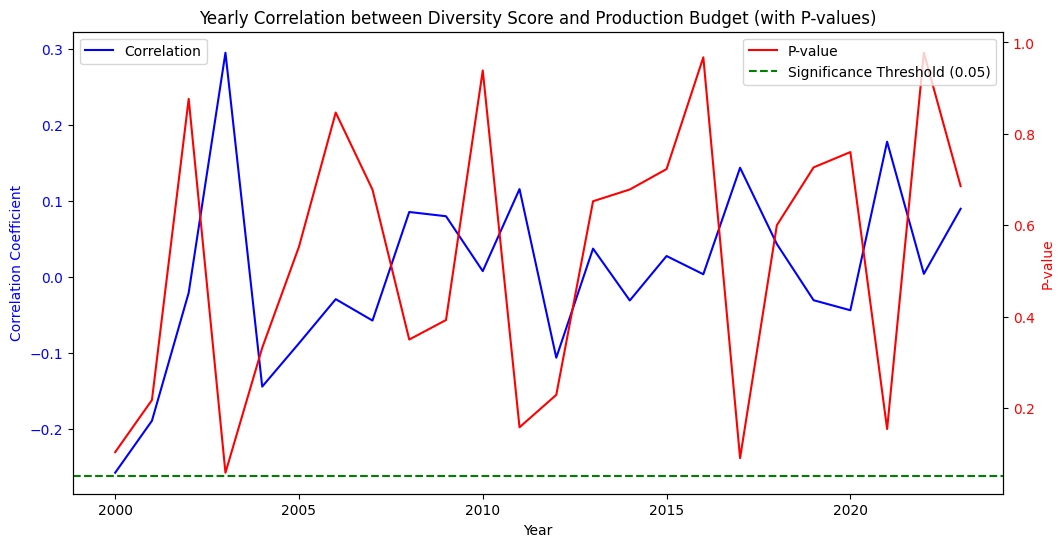

In [65]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot correlation coefficients
ax1.plot(correlation_by_year.index, correlation_by_year.values, color='b', label='Correlation')
ax1.set_xlabel('Year')
ax1.set_ylabel('Correlation Coefficient', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot p-values
ax2.plot(p_values.index, p_values.values, color='r', label='P-value')
ax2.set_ylabel('P-value', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.axhline(y=0.05, color='g', linestyle='--', label='Significance Threshold (0.05)')
ax2.legend(loc='upper right')

plt.title('Yearly Correlation between Diversity Score and Production Budget (with P-values)')
plt.show()


In [68]:
###### Audience Score and Profitabiloty have super high corr and low P val ###
import statsmodels.api as sm

# Prepare your data (ensure it's cleaned and in the correct format)
# Assuming 'Profitability' is already calculated as Worldwide Gross - Production Budget

# Multiple regression model
X = df[['diversity_score', 'tomatometer', 'audience_score', 'Production Budget']]  # Add more predictors if needed
y = df['profitability']
X = sm.add_constant(X)  # Add a constant term

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          profitability   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     433.4
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          4.42e-279
Time:                        11:54:00   Log-Likelihood:                -46837.
No. Observations:                2322   AIC:                         9.368e+04
Df Residuals:                    2317   BIC:                         9.371e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.086e+08   1.09e+0